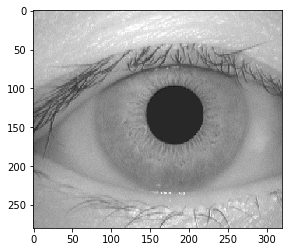

In [40]:
import os
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import numpy as np
import pandas as pd

imgPath=""
imgFilename="001_1_1.bmp"
img_color = cv2.imread(imgPath+imgFilename)
img_RGB = cv2.cvtColor(img_color, cv2.COLOR_BGR2RGB)
img_gray = cv2.cvtColor(img_RGB, cv2.COLOR_BGR2GRAY)
plt.imshow(img_color)

In [41]:
m = len(img_RGB)
n = len(img_RGB[0])
print(m,n)

280 320


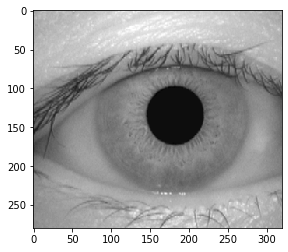

In [125]:
plt.imshow(img_blur,cmap = 'gray')

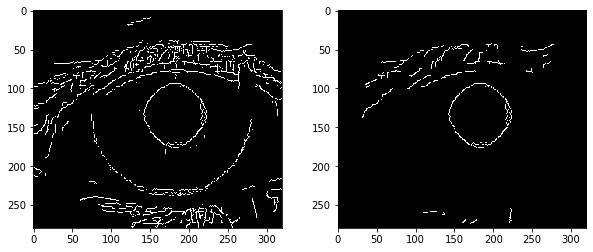

In [160]:
# Create an edge image 
#img_blur = cv2.GaussianBlur(img_gray,(7,7),0)
img_blur = cv2.blur(img_gray, ksize = (10, 10))
med_val = np.median(img_blur)
lower = int(max(0, .1*med_val))
upper = int(min(255, .2*med_val))
edges1 = cv2.Canny(img_blur, threshold1 = lower, threshold2 = upper)
edges2 = cv2.Canny(img_blur, threshold1 = lower*2, threshold2 = upper*2)

plt.figure(figsize=(10,4));
plt.subplot(121);
plt.imshow(edges1, cmap = 'gray')
plt.subplot(122);
plt.imshow(edges2, cmap = 'gray')

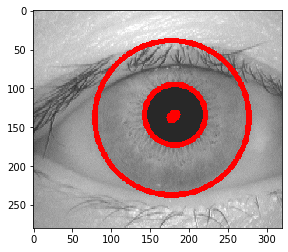

In [168]:
# Iris contour through Hough transform
circle1 = cv2.HoughCircles(edges1, cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=40, minRadius=30, maxRadius=100)
circle2 = cv2.HoughCircles(edges2, cv2.HOUGH_GRADIENT, 1, 100, param1=100, param2=20, minRadius=20, maxRadius=60)
c1 = circle1[0, :, :]
c1 = np.uint16(np.around(c1))
c2 = circle2[0, :, :]
c2 = np.uint16(np.around(c2))
img1 = img_RGB.copy()
cv2.circle(img1, (c1[0][0], c1[0][1]), c1[0][2], (255, 0, 0), 5)
cv2.circle(img1, (c1[0][0], c1[0][1]), 2, (255, 0, 0), 10)
cv2.circle(img1, (c2[0][0], c2[0][1]), c2[0][2], (255, 0, 0), 5)
cv2.circle(img1, (c2[0][0], c2[0][1]), 2, (255, 0, 0), 10)

plt.imshow(img1)